# Dark matter substructure model:

In [1]:
from substructure_new_model_CDM import *
import matplotlib as mpl

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Define the main variables of the new model (The subhalos spatial distribution is defines as the one of a host halo of mass M0 at redshift 0): 

In [10]:
M0=1e12                         #Mass of the host halo.
N_ma=400                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for accretion.
N_r=100                         #The number of distance/Rvir values in the given range [0.01,1]
redshift = 0                    #Host's redshift.

logmamin=-2                     #The minimum subhalos' masss in units of ln(mass), with mass in units of solar masses.
mmodel_1=2                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=1                      #This dm/dt model correspond to the model with no spatial information.
logr=True                       #Argument for logspace values of distance/Rvir.
dz = 0.1

The new model for the above parameters can be calculated:

In [11]:
#Calculating the substructure with the new model with use of spatial information:

ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new,zacc_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1,logr=logr,dz=dz)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/Substructure_models_cz_0/rmin_fit/Untitled Folder/substructure_new_model_CDM.py:179: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/Substructure_models_cz_0/rmin_fit/Untitled Folder/substructure_new_model_CDM.py:179: RuntimeWarning: overflow encountered in exp
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/Substructure_models_cz_0/rmin_fit/Untitled Folder/substructure_new_model_CDM.py:215: RuntimeWarning: invalid value encountered in true_divide
  Phi = Ffunc_Yang(delcM,delca,sM,sa)/normB*np.heaviside(mmax-ma,0)


25247630390691.21
252476303908.8593


In [12]:
#Calculating the substructure with the initial model with no use of spatial information:

ma200_av, rs_a_av, rhos_a_av, m0_av, rs0_av, rhos0_av, ct0_av, weight_av, survive_av,r_av,zacc_av  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=3,mmodel=mmodel_2)

ma200_av  *= Msolar
m0_av     *= Msolar
rs_a_av   *= kpc
rs0_av    *= kpc
rhos_a_av *= Msolar/pc**3
rhos0_av  *= Msolar/pc**3

rpeak_av = 2.163*rs_a_av
rmax_av  = 2.163*rs0_av
Vpeak_av = np.sqrt(4.*np.pi*G*rhos_a_av/4.625)*rs_a_av
Vmax_av  = np.sqrt(4.*np.pi*G*rhos0_av/4.625)*rs0_av

## Mass function:

In [13]:
def mass_f(m0,weight,case='1'):
    N,lnm_edges = np.histogram(np.log(m0/Msolar),weights=weight)#,bins=100)
    lnm = (lnm_edges[1:]+lnm_edges[:-1])/2.
    dlnm = lnm_edges[1:]-lnm_edges[:-1]
    m = np.exp(lnm)
    dNdlnm = N/dlnm
    dNdm   = dNdlnm/m
    if case == '1':
        dNdm = dNdlnm/m
        return m,m**2*dNdm
    else:
        return m,dNdlnm

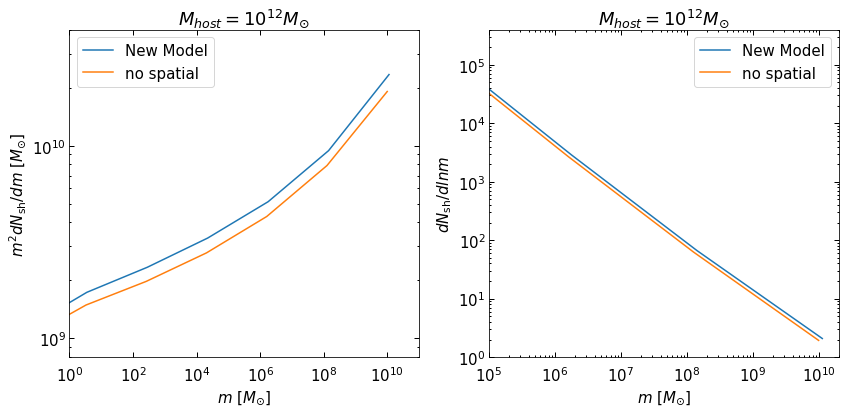

In [14]:
m_new1, m2dndm_new = mass_f(m0_new,weight_new,case='1')
m_av1, m2dndm_av = mass_f(m0_av,weight_av,case='1')

m_new2, dndlnm_new = mass_f(m0_new,weight_new,case='2')
m_av2, dndlnm_av = mass_f(m0_av,weight_av,case='2')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.loglog(m_new1,m2dndm_new)
ax1.loglog(m_av1,m2dndm_av)
ax2.loglog(m_new2,dndlnm_new)
ax2.loglog(m_av2,dndlnm_av)

for ax in (ax1,ax2):
    ax.legend([r'New Model','no spatial'])
    ax.set_title('$M_{host}=10^{ %i } M_{\odot}$' %np.log10(M0),loc='center')
    ax.set_xlabel(r'$m$ [$M_{\odot}$]')

ax1.set_ylabel(r'$m^{2} dN_{\rm sh}/dm$ [$M_{\odot}$]')
ax2.set_ylabel(r'$ dN_{\rm sh}/dlnm$')# [$M_{\odot}$]')
ax1.set_xlim(1e0,1e11)
ax1.set_ylim(8e8,4e10)
ax2.set_xlim(1e5,2e10)
ax2.set_ylim(1e0,4e5)
plt.tight_layout()
#plt.savefig('massf_comp_new.png')
plt.show()

## Satellite Galaxies (galaxy formation of hydrogen cooling $V_{sh,peak}$>18 km/s):

In [15]:
#Satellites Cumulative distribution with Formation condition Vpeak>18 km/s:
def sat_vth(Vmax,Vpeak,weight,m0,Vpeak_max=18,case='1',mmin = 1e-6):
    if case=='1':
        N,x_edges = np.histogram(Vmax[(Vpeak>Vpeak_max*km/s)*(m0>mmin*Msolar)]/(km/s),
                             weights=weight[(Vpeak>Vpeak_max*km/s)*(m0>mmin*Msolar)],bins=10000)
    else:
        N,x_edges = np.histogram(Vmax[m0>mmin*Msolar]/(km/s),weights=weight[m0>mmin*Msolar],bins=10000)

    x = (x_edges[1:]+x_edges[:-1])/2.
    Ncum = np.cumsum(N)
    Ncum = Ncum[-1]-Ncum

    return Ncum[0], x, Ncum

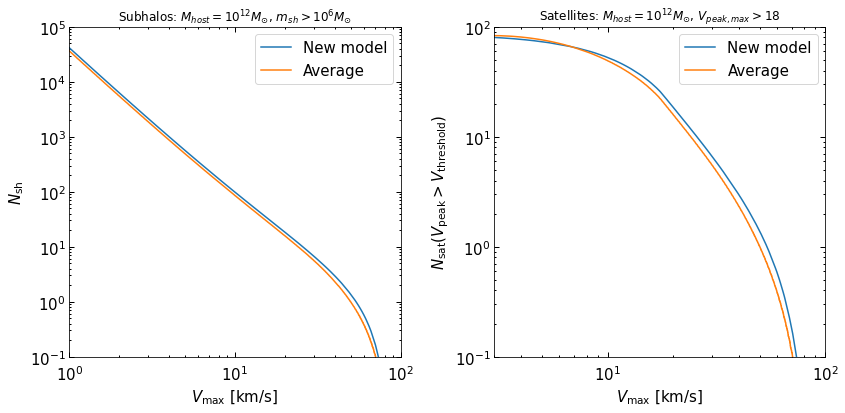

In [16]:
Vpeak_max = 18

Ncum1,v_sub1,N_sub_new = sat_vth(Vmax_new,Vpeak_new,weight_new,m0_new,
                                 Vpeak_max=Vpeak_max,case='1')
Ncum2,v_sub2,N_sub_av = sat_vth(Vmax_av,Vpeak_av,weight_av,m0_av,Vpeak_max=Vpeak_max,case='1')

Ncum3,v_sat1,N_sat_new = sat_vth(Vmax_new,Vpeak_new,weight_new,m0_new,
                                 Vpeak_max=Vpeak_max,case='2')
Ncum4,v_sat2,N_sat_av = sat_vth(Vmax_av,Vpeak_av,weight_av,m0_av,Vpeak_max=Vpeak_max,case='2')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ax2.loglog(v_sub1,N_sub_new)
ax2.loglog(v_sub2,N_sub_av)
ax1.loglog(v_sat1,N_sat_new)
ax1.loglog(v_sat2,N_sat_av)

ax1.set_title('Subhalos: $M_{host}=10^{ %i } M_{\odot}$' %np.log10(M0) + 
              str(r', $m_{sh}>10^{6} M_{\odot}$'),loc='center',fontsize=12)

ax2.set_title('Satellites: $M_{host}=10^{ %i } M_{\odot}$' %np.log10(M0) + 
              str(r', $V_{peak,max}>$') + str(Vpeak_max),loc='center',fontsize=12)

ax1.set_ylabel(r'$N_{\rm sh}$')
ax2.set_ylabel(r'$N_{\rm sat}(V_{\rm peak}>V_{\rm threshold})$')
for ax in (ax1,ax2):
    ax.legend([r'New model',r'Average'])
    ax.set_xlabel(r'$V_{\rm max}$ [km/s]')


ax1.set_xlim(1,1e2)
ax1.set_ylim(1e-1,1e5)
ax2.set_xlim(3,1e2)
ax2.set_ylim(1e-1,1e2)

plt.tight_layout()
#plt.savefig('vsat_comp_new.png')

In [17]:
print("Subhalos for the model without spatial information:",Ncum4)
print("Subhalos for the model with spatial information:",Ncum3)

print("Satellites galaxies for the model without spatial information:",Ncum2)
print("Satellites galaxies for the model with spatial information:",Ncum1)

Subhalos for the model without spatial information: 8121701033.100525
Subhalos for the model with spatial information: 9174271012.319153
Satellites galaxies for the model without spatial information: 83.14489491820808
Satellites galaxies for the model with spatial information: 83.14510962922688


## Satellite Galaxies mass and density distribution:

In [18]:
def sat_vth_mass(Vpeak,weight,m0,Vpeak_max=18):
    N,x_edges = np.histogram(np.log(m0[(Vpeak>Vpeak_max*km/s)]/Msolar),
                             weights=weight[(Vpeak>Vpeak_max*km/s)],bins=20,density=True)
    lnm = (x_edges[1:]+x_edges[:-1])/2.
    m = np.exp(lnm)
    return m, N
    
def sat_vth_rho(rho,Vpeak,weight,Vpeak_max=18):
    N,x_edges = np.histogram(rho[(Vpeak>Vpeak_max*km/s)]/(Msolar/pc**3),
                             weights=weight[Vpeak>Vpeak_max*km/s],bins=30,density=True)
    x = (x_edges[1:]+x_edges[:-1])/2.
    return x, N

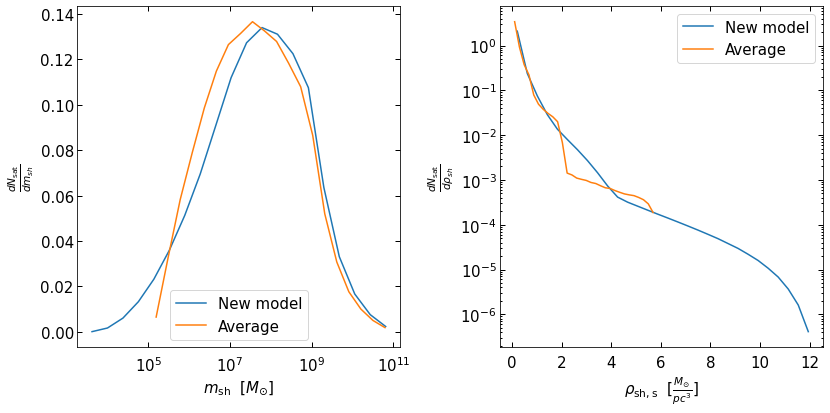

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
x1,n1=sat_vth_mass(Vpeak_new,weight_new,m0_new,Vpeak_max=18)
x2,n2=sat_vth_mass(Vpeak_av,weight_av,m0_av,Vpeak_max=18)
ax1.plot(x1,n1)
ax1.plot(x2,n2)
ax1.set_xscale('log')

x1,n1=sat_vth_rho(rhos0_new,Vpeak_new,weight_new,Vpeak_max=18)
x2,n2=sat_vth_rho(rhos0_av,Vpeak_av,weight_av,Vpeak_max=18)
ax2.plot(x1,n1)
ax2.plot(x2,n2)
ax2.set_yscale('log')

for ax in (ax1,ax2):
    ax.legend([r'New model',r'Average'])
ax1.set_ylabel(r'$\frac{dN_{\rm sat}}{dm_{sh}}$')
ax2.set_ylabel(r'$\frac{dN_{\rm sat}}{d\rho_{sh}}$')

ax1.set_xlabel(r'$m_{\rm sh}$  $[M_{\odot}]$')
ax2.set_xlabel(r'$\rho_{\rm sh,s}$  $[\frac{M_{\odot}}{pc^{3}}]$')
plt.tight_layout()
#plt.savefig('vsat_comp_new_add.png')

## Satellite Galaxies comparison between the new model and Milky Way's Satellite Galaxies:

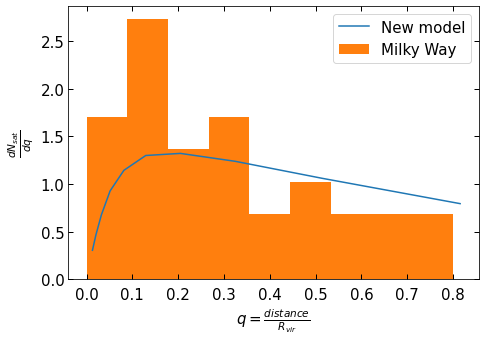

In [20]:
#Calculating Milky Way's Virial Radius:
c = c_from_Mvir(Mvir=1.8*M0*Msolar,z=redshift)
Oz = Omegaz(pOmega,redshift)
rvir_mw = (3.*1.8*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)

plt.figure(figsize=(7,5))
bins=np.logspace(-2,0,11)
N,x_edges = np.histogram(r_new[Vpeak_new>18*km/s],weights=weight_new[Vpeak_new>18*km/s],
                         bins=bins,density=True)
x = (x_edges[1:]+x_edges[:-1])/2.
plt.plot(x,N)

#Milky Way's satellite galaxies positions (only those smaller than 1 host's virial radius):
MW_sat = np.array([107.9,66,42,218,160,36.2,44,20,380,120,132,79,27.6,154,417 ,178,215,182,30,23,35,
          30,57,25,97,32,105,76,147,254,233,26,86,86,76])
bins=np.linspace(0,0.8,10)
qq=plt.hist(MW_sat*kpc/rvir_mw,bins=bins,density=True)

plt.xlabel(r'$q=\frac{distance}{R_{vir}}$')
plt.ylabel(r'$\frac{dN_{sat}}{dq}$')
plt.legend(['New model','Milky Way'])
plt.tight_layout()

# Spatial result of the updated model and simulation

Here I define the functions that are the result of Shunichi 's work on radial linear subhalo's CDF,with the function Simulation_2(x) being more accurate.The functions Simulation_1(x),Simulation_2(x) can be found at slide 23 and 24 at Shunichi's slides. The Simulation_1(x) is noted as (4.1) and Simulation_2(x) as (4.2) by the respected equations in my notion page. The defined Einasto profile is the same as the one in the Aquarius project (https://arxiv.org/pdf/0809.0898.pdf , page 13,figure 11):

In [21]:
#Host halo virial radius and scale radius:
c = c_from_Mvir(Mvir=M0*Msolar,z=redshift)
Oz = Omegaz(pOmega,redshift)
rvir = (3.*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)
rs = rvir/c

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high

#Aquarius project:
def einasto(r,alpha = 0.678 , r_2 = 0.81,N=1):
    power = (-2/alpha)*((r/r_2)**alpha-1)
    return N*np.exp(power)

#First results by fitting:
def Simulation_1(x):
    c=0.821
    S=1.519
    return S*(c*x**2)/(c*x**2+(1-c)*(1-x)**2)

#Second results (and better one) by fitting:
def Simulation_2(x):
    a=2.2
    c=0.606
    S=9.839
    return S*x**2/(1+(x/c)**2)**(3/a)

#Function for selecting subhalos' mass within a specific mass range,the variable m0 is an array:

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high


## Normalized Number density results:

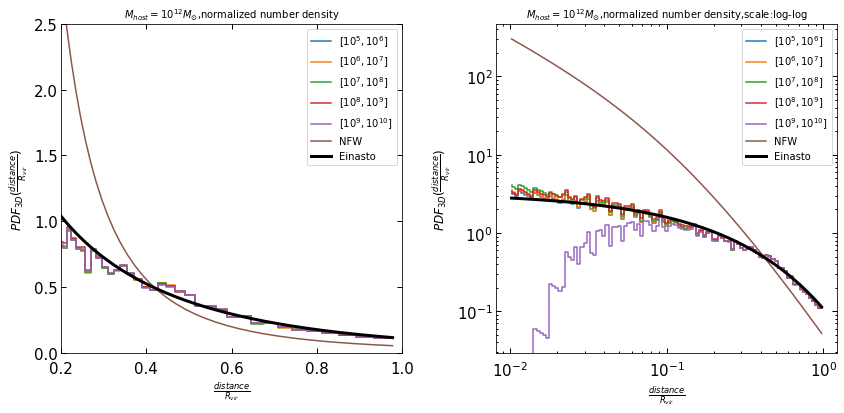

In [22]:
names = ['$[10^{5},10^{6}]$','$[10^{6},10^{7}]$','$[10^{7},10^{8}]$','$[10^{8},10^{9}]$','$[10^{9},10^{10}]$']
bins=np.logspace(np.log10(0.01),0,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density,scale:log-log', fontsize=10)
for i in range(5,10):
    w=mass_selection(10**(i),10**(i+1.),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    dNdr=NN/dr
    norm=(dNdr*dr).sum()
    dNdr=dNdr/norm
    dNdV=dNdr/(4*np.pi*radius**2)
    ax1.step(radius,dNdV)
    ax2.step(radius,dNdV)
    
for ax in (ax1,ax2):
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{3D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,radial_weights(radius,M=M0)/(4*np.pi*radius**2))
    ax.plot(radius,einasto(radius,N=1)/sum(einasto(radius,N=1)*4*np.pi*radius**2*dr),linewidth=3.0,color='black')

names.append("NFW")
names.append("Einasto")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,2.5)
plt.tight_layout()
#plt.savefig('model_2_num_den_new.png')

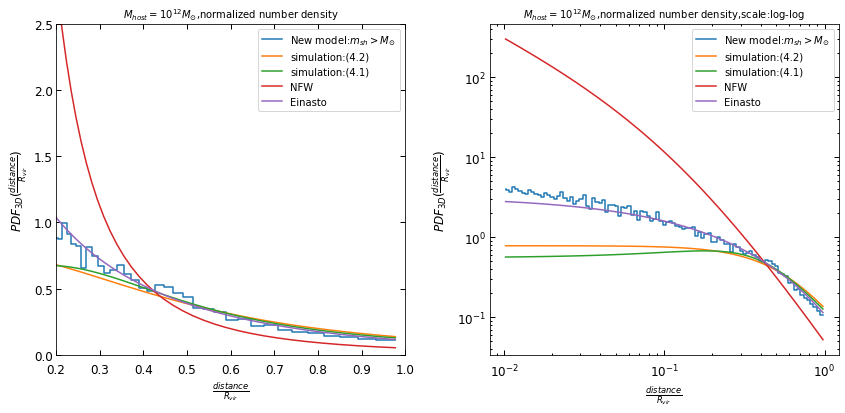

In [23]:
names=[]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density,scale:log-log', fontsize=10)

w=mass_selection(1,10**(12),m0_new)
NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
radius=(rr[1:]+rr[:-1])/2.
dr=rr[1:]-rr[:-1]
dNdr=NN/dr
norm=(dNdr*dr).sum()
dNdr=dNdr/norm
dNdV=dNdr/(4*np.pi*radius**2)
ax1.step(radius,dNdV)
ax2.step(radius,dNdV)
names.append("New model:$m_{sh}>M_{\odot}$")
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{3D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius)/(4*np.pi*radius**2))
    ax.plot(radius,Simulation_1(radius)/(4*np.pi*radius**2))
    ax.plot(radius,radial_weights(radius,M=M0)/(4*np.pi*radius**2))
    ax.plot(radius,einasto(radius,N=1)/sum(einasto(radius,N=1)*4*np.pi*radius**2*dr))

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
names.append("NFW")
names.append("Einasto")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,2.5)
plt.tight_layout()
#plt.savefig('model_2_num_den.png')

## Subhalos Number Density (Shin'ichiro's code):

In [24]:
m_min=1
rmin=0.01
N_r = 25
def my_model(r,weight,m0,survive,zacc,m_min=m_min,N_r=N_r,rmin=rmin,z_min=0.):
    w=(m0> m_min*Msolar)*(survive==1)*(zacc>z_min)
    bins=np.logspace(np.log10(rmin),0,N_r+1)
    #Calculating subhalo-distance relation of N(r):
    Nsh,rr=np.histogram(r[w],weights=weight[w],bins=bins)
    q=(bins[1:]+bins[:-1])/2.
    dq=bins[1:]-bins[:-1]
    #Calculating number density n(r)= N(r)/dV,with dV=(4*pi*r**2)*dr:
    nsh_list = Nsh/(4.*np.pi*dq*q**2*(rvir/kpc)**3)
    return q,nsh_list

q_new,nsh_list_new=my_model(r=r_new,weight=weight_new,m0=m0_new,
                              survive=survive_new,zacc=zacc_new,N_r=N_r,z_min=0.)

In [25]:
q_av = np.logspace(-2,0,N_r)
nsh_av = np.empty_like(q_av)

for i in np.arange(np.alen(q_av)):
    q = q_av[i]

    Nsh = np.sum(weight_av[(m0_av>m_min*Msolar)*(survive_av==1)])
    r = q*rvir
    #Adding spatial weights:
    nsh = Nsh/(4.*np.pi*r*(r+rs)**2*(np.log(1.+c)-c/(1.+c)))
    nsh_av[i] = nsh/(kpc**-3)

<ipython-input-26-ac57c9799257>:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0,200)


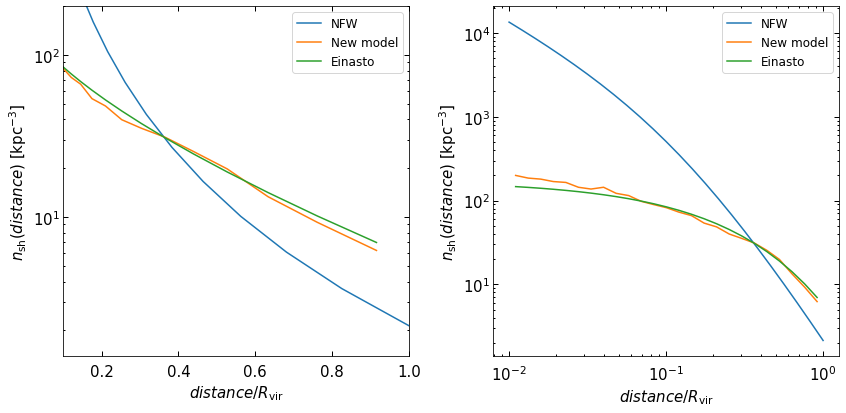

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

for ax in (ax1,ax2):
    ax.plot(q_av,nsh_av)
    ax.plot(q_new,nsh_list_new)
    ax.plot(q_new,einasto(q_new,N=9e0))
    ax.legend(['NFW','New model','Einasto'],fontsize=12)
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.set_ylabel(r'$n_{\rm sh}(distance)$ [kpc$^{-3}$]')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.1,1)
ax1.set_ylim(0,200)
plt.tight_layout()
#plt.savefig('num_den_comp_new.png')

# Subhalos Mass fraction:

In [27]:
def mass_fraction(mass,weight ,Mhost=M0,evolved=True):
    Mhost=Mhost*Msolar
    if evolved:
        fsh = np.sum(mass*weight)/Mhost
    else:
        fsh = np.sum(mass*weight)/Mhost
    return fsh

print(mass_fraction(m0_new,weight_new ,Mhost=M0),mass_fraction(m0_av,weight_av ,Mhost=M0))

0.11885037428445952 0.0984242414813562


## Mass Fraction Distance Relation:

In [28]:
rl=np.logspace(-2,np.log10(1.02),40)
ff1=np.zeros(len(rl)-1)
pos=np.zeros(len(rl)-1)
for i in range(0,len(rl)-1):
    pos[i]=(rl[i]+rl[i+1])/2    
    ff1[i]=mass_fraction(mass=m0_new[(r_new>rl[i])*(r_new<rl[i+1])],
                  weight=weight_new[(r_new>rl[i])*(r_new<rl[i+1])],Mhost=M0)

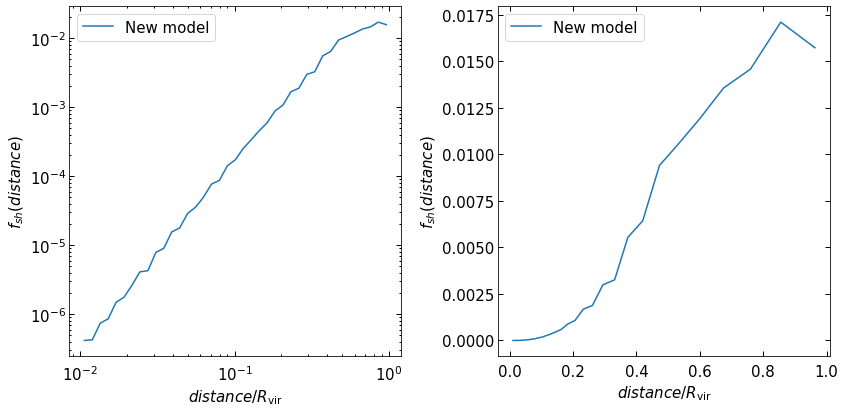

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.plot(pos,ff1)
    ax.set_ylabel('$f_{sh}(distance)$')
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.legend(['New model'])

ax1.set_xscale('log')
ax1.set_yscale('log')    
plt.tight_layout()
#plt.savefig('f_dis_2.png')

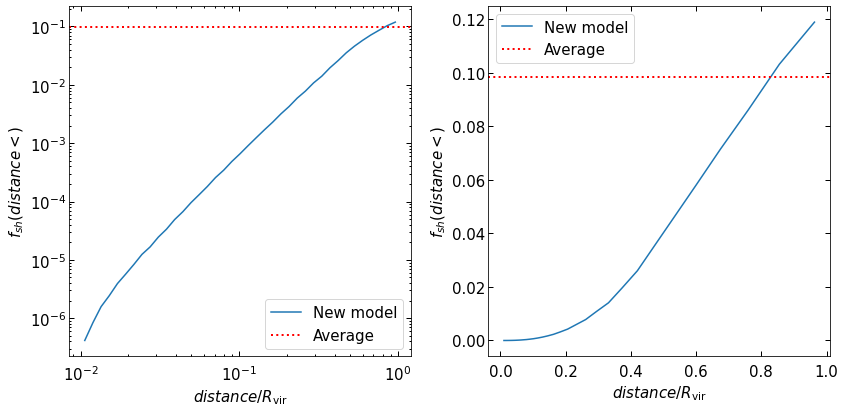

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.plot(pos,np.cumsum(ff1))
    ax.set_ylabel('$f_{sh}(distance<)$')
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.axhline(mass_fraction(mass=m0_av,weight=weight_av,Mhost=M0),
                color='r', linestyle='dotted', lw=2)
    ax.legend(['New model','Average'])

ax1.set_xscale('log')
ax1.set_yscale('log')    
plt.tight_layout()
#plt.savefig('f_dis_cumsum2.png')

## Dark Matter Annihilation Boost Factor:

In [31]:
#Same code as the initial code git function:

def annihilation_boost_factor(rhos0,rs0,ct0,mass,weight,Mhost=M0,redshift=0):    
    fsh = mass_fraction(mass=mass,weight=weight ,Mhost=M0)
    
    Lsh = np.sum(rhos0**2*rs0**3*(1.-1./(1.+ct0)**3)*weight)
    Mhost=Msolar*Mhost
    r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
    c200_host = conc200(Mhost,redshift)
    rs_host   = r200_host/c200_host
    rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
    Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
    Bsh = Lsh/Lhost0
    luminosity_ratio = 1.-fsh**2+Bsh
    return Bsh, luminosity_ratio

In [32]:
print("Boost factor for model without spatial information:",
    annihilation_boost_factor(rhos0=rhos0_new,rs0=rs0_new,
                              ct0=ct0_new,mass=m0_new,weight=weight_new)[0])

print("Boost factor for model with spatial information:",
    annihilation_boost_factor(rhos0=rhos0_av,rs0=rs0_av,
                              ct0=ct0_av,mass=m0_av,weight=weight_av)[0])

Boost factor for model without spatial information: 1.6382223645147365
Boost factor for model with spatial information: 1.422763373237978


## Boost factor - distance plot:

In [33]:
def annihilation_boost_factor_dist(r,rhos0,rs0,ct0,mass,weight,rmin=0.01,N_r=100,logr=logr,
                                   Mhost=M0,redshift=0):    
    
    fsh = mass_fraction(mass=mass,weight=weight ,Mhost=M0)
    bins=np.logspace(np.log10(rmin),0,N_r+1)
    
    Lsh = rhos0**2*rs0**3*(1.-1./(1.+ct0)**3)*weight

    Mhost=Msolar*Mhost
    r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
    c200_host = conc200(Mhost,redshift)
    rs_host   = r200_host/c200_host
    rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
    Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
    Bsh = Lsh/Lhost0
    luminosity_ratio = 1.-fsh**2+Bsh
    Boost,distance_edge =np.histogram(r,weights=Bsh,bins=bins)
    distance = (distance_edge[1:]+distance_edge[:-1])/2

    return Boost, distance

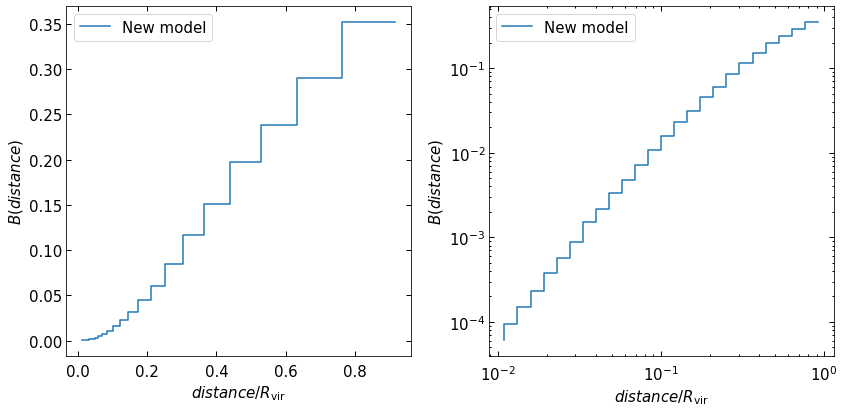

In [34]:
Boost,distance = annihilation_boost_factor_dist(r=r_new,rhos0=rhos0_new, \
                    rs0=rs0_new,rmin=rmin,N_r=N_r,logr=logr,ct0=ct0_new,mass=m0_new,\
                                                        weight=weight_new)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.step(distance,Boost)
    ax.legend(['New model'])#,fontsize=12)
    ax.set_xlabel(r'$distance /R_{\rm vir}$')
    ax.set_ylabel(r'$B(distance)$')

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()
#plt.savefig('boost_f_comp_new.png')
plt.show()

## Surface Brightness - distance plot:

$S(distance)= \frac{B(distance<)}{4 \cdot \pi \cdot distance^{2}}$

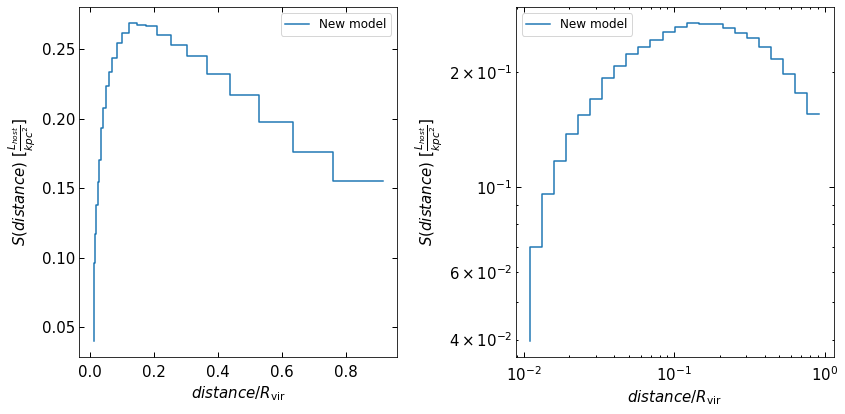

In [35]:
S=np.cumsum(Boost)/(4*np.pi*distance**2)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.step(distance,S)
    ax.legend(['New model'],fontsize=12)
    ax.set_xlabel(r'$distance /R_{\rm vir}$')
    ax.set_ylabel(r'$S(distance)$ $[\frac{L_{host}}{kpc^{2}}]$')

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()
#plt.savefig('surf_bright_comp_new.png')
plt.show()

## Boost factor - distance fitting:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spopt
import scipy.integrate as spint
import scipy.interpolate as spinterp

def logf2(x,*par):
    return par[3]*x**3+par[2]*x**2+par[1]*x+par[0]

def logf1(x,*par):
    return par[2]*x**2+par[1]*x+par[0]

def fiting_log(function,p0,d,B):
    ml_cfpars, ml_cfcovar = spopt.curve_fit(function,d,B,p0)
    model_ens = np.linspace(-2,0,1000)
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.scatter(d,B, marker="o")
    # Plot the model as a continuous curve    
    ax1.plot(model_ens, function(model_ens,*ml_cfpars), lw=2)
    ax1.set_ylabel("$log_{10}(Boost Factor)$", fontsize=12)
    ax1.tick_params(labelsize=14)

    ax2.scatter(d,function(d,*ml_cfpars)/B,marker="o")
    ax2.set_xlabel(r'$log_{10}(\frac{distance}{R_{vir}})$',fontsize=16)
    ax2.set_ylabel("model/data", fontsize=12)
    ax2.axhline(1.0, color='r', linestyle='dotted', lw=2) 
    plt.show()
    return ml_cfpars

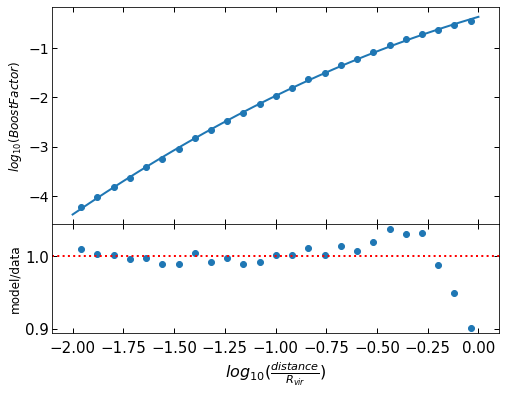

Boost factor=10^(( -0.4 )*log10(d)^2+( 1.2 )*log10(d)+ -0.36 )


In [37]:
p0=[1.4,-1.6,1]
parameters_1=fiting_log(logf1,p0,np.log10(distance),np.log10(Boost))
print("Boost factor=10^((",round(parameters_1[2],2),")*log10(d)^2+(",round(parameters_1[1],2),
      ")*log10(d)+",round(parameters_1[0],2),")")

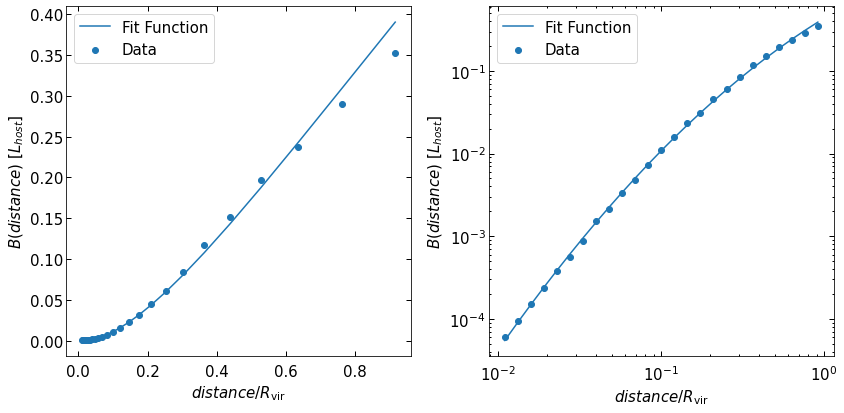

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.plot(distance,10**logf1(np.log10(distance),*parameters_1))
    ax.scatter(distance,Boost)
    ax.legend(['Fit Function','Data'])
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.set_ylabel(r'$B(distance)$ [$L_{host}$]')

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()
#plt.savefig('num_den_comp_new.png')

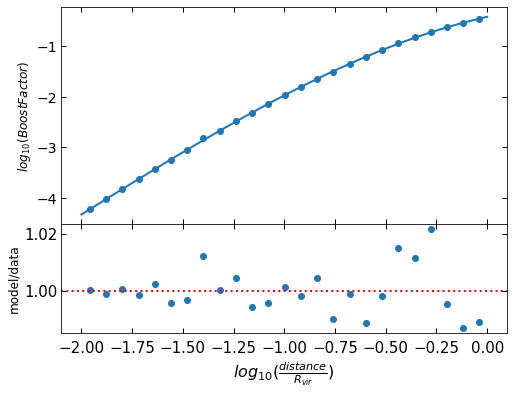

Boost factor= 10^(( -0.13 )*log10(d)^3+( -0.79 )*log10(d)^2+( 0.9 )*log10(d)+ -0.41 )


In [39]:
p0=[1.4,-1.6,1,1]
parameters_2=fiting_log(logf2,p0,np.log10(distance),np.log10(Boost))
print("Boost factor=","10^((",round(parameters_2[3],2),")*log10(d)^3+(",round(parameters_2[2],2),
      ")*log10(d)^2+(",round(parameters_2[1],2),")*log10(d)+",round(parameters_2[0],2),")")

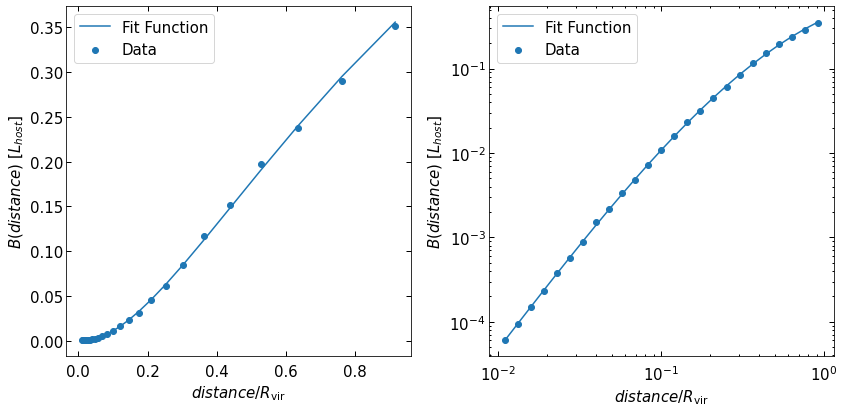

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.plot(distance,10**logf2(np.log10(distance),*parameters_2))
    ax.scatter(distance,Boost)
    ax.legend(['Fit Function','Data'])
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.set_ylabel(r'$B(distance)$ [$L_{host}$]')

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()

## Dark Matter Halo's Substructure Luminosity Templates:

## Creating Mock Catalogue of Subhalos (same as main code git):

In [41]:
def subhalo_catalog_MC(m0_g,rs0_g,rhos0_g,ct0_g,weight_g,mth,r_g=None):
    
    condition = (m0_g>mth)
    m0        = m0_g[condition]
    rs0       = rs0_g[condition]
    rhos0     = rhos0_g[condition]
    ct0       = ct0_g[condition]
    weight    = weight_g[condition]
        
    mu_sh      = np.sum(weight)
    prob       = weight/mu_sh
    subhalo_id = np.arange(np.alen(prob))
    N_sh       = np.random.poisson(mu_sh)
    id_MC      = np.random.choice(subhalo_id,size=N_sh,p=prob)

    m0_MC      = m0[id_MC]
    rs0_MC     = rs0[id_MC]
    rhos0_MC   = rhos0[id_MC]
    ct0_MC     = ct0[id_MC]

    if r_g is None:
        return m0_MC/Msolar, rs0_MC/kpc, rhos0_MC/(Msolar/pc**3), ct0_MC 
    else:
        r = r_g[condition]
        r_MC = r[id_MC]
        return m0_MC/Msolar, rs0_MC/kpc, rhos0_MC/(Msolar/pc**3), ct0_MC , r_MC

In [42]:
m_min_sub = 1e8
m0_mc, rs0_mc, rhos0_mc, ct0_mc, r_mc = subhalo_catalog_MC(m0_new,rs0_new,
                rhos0_new,ct0_new,weight_new,m_min_sub*Msolar,r_g=r_new)

### Random x,y values from orbital radius of subhalos, with z axis being same as line of sight:

In [43]:
phi_mc=np.random.uniform(0,2*np.pi,len(r_mc))
theta_mc=np.random.uniform(0,2*np.pi,len(r_mc))
center_x_mc = np.sin(theta_mc)*np.cos(phi_mc)*r_mc
center_y_mc = np.sin(theta_mc)*np.sin(phi_mc)*r_mc

### Calculating the boost factor value of the simulated subhalos (same as main code git):

In [44]:
Mhost=Msolar*1e12
r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
c200_host = conc200(Mhost,redshift)
rs_host   = r200_host/c200_host
rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
Lsh_mc = (rhos0_mc*Msolar/pc**3)**2*(rs0_mc*kpc)**3*(1.-1./(1.+ct0_mc)**3)
Bsh_mc = Lsh_mc/Lhost0

## Creating a 2-D projection of the simulated subhalos luminosity based on the fitted boost faction (adjusted by a scale factor) assuming spherical symmetry:

In [45]:
N_r2=200
N_angle=2000
Bsh_tot = annihilation_boost_factor(rhos0=rhos0_new,rs0=rs0_new,ct0=ct0_new,mass=m0_new,weight=weight_new)[0]
def annihilation_lum_template_sh(rs0,ct0,Bsh,center_x0,center_y0,rvir=rvir,Mhost=M0,N_r=N_r2,
                                 N_angle=N_angle,Bsh_tot=Bsh_tot):
    
    x_sub = np.zeros(len(center_y0)*N_r*N_angle)
    y_sub = np.zeros(len(center_y0)*N_r*N_angle)
    boost_sub = np.zeros(len(center_y0)*N_r*N_angle)
    for i in range(0,len(rs0)):
        rt=(ct0_mc[i]*rs0_mc[i])/(rvir/kpc)
        distance = np.linspace(0.1,1,N_r)*rt
        center_x = np.zeros((len(distance),N_angle))
        center_y = np.zeros((len(distance),N_angle))
        boost_point = np.zeros((len(distance),N_angle))
        for j in range(0,len(distance)):
            phi=np.random.uniform(0,2*np.pi,N_angle)
            theta=np.random.uniform(0,np.pi,N_angle)
            center_x[j,:] = center_x0[i] + np.sin(theta)*np.cos(phi)*distance[j]
            center_y[j,:] = center_y0[i] + np.sin(theta)*np.sin(phi)*distance[j]
            boost_point[j,:] = (10**logf2(np.log10(distance[j]),*parameters_2)/Bsh_tot)*Bsh[i]/N_angle
            #print(10**logf2(np.log10(distance[j]),*parameters_2),Bsh[i])

        center_x = np.reshape(center_x,N_r*N_angle)
        center_y = np.reshape(center_y,N_r*N_angle)
        boost_point = np.reshape(boost_point,N_r*N_angle)
        
        x_sub[N_r*N_angle*i:N_r*N_angle*(i+1)] = center_x
        y_sub[N_r*N_angle*i:N_r*N_angle*(i+1)] = center_y
        boost_sub[N_r*N_angle*i:N_r*N_angle*(i+1)] = boost_point
    
    return x_sub,y_sub,boost_sub

## Creating a 2-D projection of subhalos luminosity based on the model's results assuming spherical symmetry and ignoring the volume characteristics of each subhalo:

In [46]:
def annihilation_lum_template(r,rhos0,rs0,ct0,mass,weight,Mhost=M0,N_r=300,N_angle=5000,m_min=M0):

    Boost,distance = annihilation_boost_factor_dist(r=r[mass<=m_min*Msolar],rhos0=rhos0[mass<=m_min*Msolar],
        rs0=rs0[mass<=m_min*Msolar],rmin=rmin,N_r=N_r,logr=logr,ct0=ct0[mass<=m_min*Msolar],
        mass=mass[mass<=m_min*Msolar],weight=weight[mass<=m_min*Msolar])
    
    center_x = np.zeros((len(distance),N_angle))
    center_y = np.zeros((len(distance),N_angle))
    boost_point = np.zeros((len(distance),N_angle))
    boost_r = np.zeros(len(distance))
    for i in range(0,len(Boost)):
        phi=np.random.uniform(0,2*np.pi,N_angle)
        theta=np.random.uniform(0,np.pi,N_angle)
        center_x[i,:] = np.sin(theta)*np.cos(phi)*distance[i]
        center_y[i,:] = np.sin(theta)*np.sin(phi)*distance[i]
        boost_point[i,:] = Boost[i]/N_angle
        boost_r[i] = Boost[i]/N_angle

    center_x = center_x.reshape(N_r*N_angle)
    center_y = center_y.reshape(N_r*N_angle)
    boost_point = boost_point.reshape(N_r*N_angle)

    return center_x,center_y,boost_point

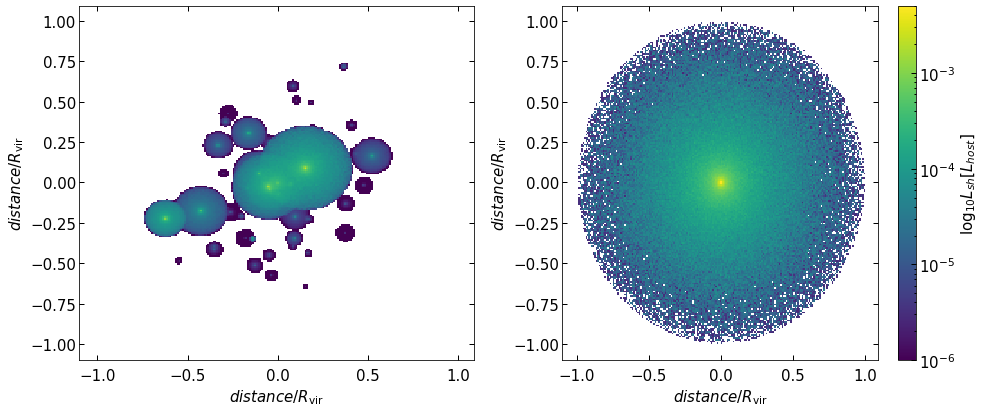

In [47]:
x_sub,y_sub,boost_sub=annihilation_lum_template_sh(rs0_mc,ct0_mc,Bsh_mc,center_x_mc,center_y_mc)
x_templ,y_templ,boost_templ = annihilation_lum_template(r_new,rhos0_new,rs0_new,ct0_new,m0_new,weight_new)
bin_x = np.arange(-1.1,1.1,0.01)
bin_y = np.arange(-1.1,1.1,0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
cb=ax2.hist2d(x_templ,y_templ,weights=boost_templ,bins=[bin_x, bin_y],
              norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=5*10**(-3)))

q=ax1.hist2d(x_sub,y_sub,weights=boost_sub,bins=[bin_x, bin_y],
            norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=5*10**(-3)))
cbar=plt.colorbar(cb[3], orientation='vertical',ax=ax2)
cbar.set_label(r'$\log_{10}L_{sh} [L_{host}]$')

for ax in (ax1,ax2):
    ax.set_xlabel(r'$distance/R_{\rm vir}$')
    ax.set_ylabel(r'$distance/R_{\rm vir}$')

plt.tight_layout()
#plt.savefig('mcsim_templ_comp.png')

## In the final part the angularly uniform templates with subhalos with mass less than $10^{8}$ solar masses is added with the simulated subhalos luminosity with mass higher than $10^{8}$ solar masses.

In [48]:
x_templ,y_templ,boost_templ = annihilation_lum_template(r_new,rhos0_new,rs0_new,ct0_new,m0_new,
                                                        weight_new,m_min=m_min_sub)
x_sub_total = np.zeros(len(x_sub)+len(boost_templ))
y_sub_total = np.zeros(len(x_sub)+len(boost_templ))
boost_sub_total = np.zeros(len(x_sub)+len(boost_templ))
#x_sub,y_sub,boost_sub
for i in range(0,len(x_sub)):
    x_sub_total[i] = x_sub[i]
    y_sub_total[i] = y_sub[i]
    boost_sub_total[i] = boost_sub[i]

for i in range(0,len(boost_templ)):
    x_sub_total[i+len(x_sub)] = x_templ[i]
    y_sub_total[i+len(x_sub)] = y_templ[i]
    boost_sub_total[i+len(x_sub)] = boost_templ[i]

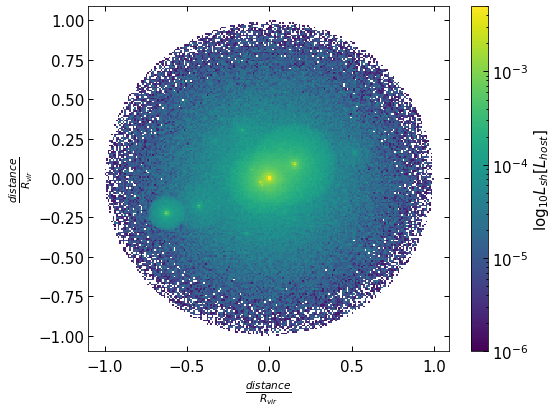

In [49]:
plt.figure(figsize=(8,6))
bin_x = np.arange(-1.1,1.1,0.01)
bin_y = np.arange(-1.1,1.1,0.01)
cb=plt.hist2d(x_sub_total,y_sub_total,weights=boost_sub_total,bins=[bin_x, bin_y],
              norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=5*10**(-3)))

cbar=plt.colorbar(cb[3], orientation='vertical')
cbar.set_label(r'$\log_{10}L_{sh} [L_{host}]$')
plt.xlabel(r"$\frac{distance}{R_{vir}}$")
plt.ylabel(r"$\frac{distance}{R_{vir}}$")
plt.tight_layout()
#plt.savefig('mcsim_templ_compination.png')